# 概述
## 决策树是如何工作的
决策树（Decision Tree）是一种非参数的有监督学习方法，它能够从一系列有特征和标签的数据中总结出决策规
则，并用树状图的结构来呈现这些规则，以解决分类和回归问题。决策树算法容易理解，适用各种数据，在解决各
种问题时都有良好表现，尤其是以树模型为核心的各种集成算法，在各个行业和领域都有广泛的应用。

## 构建决策数的两个阶段

>1. 训练阶段  
从给定的训练数据集DB，构造出一颗决策树  
`class = DecisionTree(DB)`   
2. 分类阶段  
从根开始，按照决策树的分类属性逐层往下划分，知道叶节点，获得概念(决策、分类)  
`y = DecisionTree(x)`




## 相关概念

![](images/concept.png)

# 决策树算法

## 构建决策树
原则上讲，任意一个数据集上的所有特征都可以被拿来分
枝，特征上的任意节点又可以自由组合，所以一个数据集上可以发展出非常非常多棵决策树，其数量可达指数级。在
这些树中，总有那么一棵树比其他的树分类效力都好，那样的树叫做”全局最优树“。

|**关键概念：全局最优、局部最优**|
|  :------------------------ |  
|全局最优：经过组合形成的，整体来说分类效果最好的模型|
|局部最优：每一次分枝的时候都向着更好的分类效果分枝，但无法确认如此生成的树在全局上是否是最优的|

要在这么多棵决策树中去一次性找到分类效果最佳的那一棵是不可能的，如果通过排列组合来进行筛选，计算量过于
大而且低效，因此我们不会这样做。相对的，机器学习研究者们开发了一些有效的算法，能够在合理的时间内构造出
具有一定准确率的**次最优**决策树。这些算法基本都执行”**贪心策略**“，即通过局部的最优来达到我们相信是最接近全局
最优的结果。

|关键概念：贪心算法|
| :---------|
|通过实现局部最优来达到接近全局最优结果的算法，所有的树模型都是这样的算法。|

## 算法的核心解决问题

1. 如何从数据表中找出最佳点和最佳分支
2. 如何让决策树停止生长，防止过拟合


## 选择根节点(信息增益最大的当成根节点)

### 决策树-熵
>熵：表示数据内部混乱程度。熵越大越混乱。


相关符合表示：  
$H(X), H(Y)：表示当前事情X,Y发生的不确定性。$  
$P(X)，P(Y)：表示当前事情发生的概率。$  
$P(X)越大 --> H(X)越小。(可以这么理解，一件事情发生的概率越大说明它的不确定性越小。)$  
$P(X)越小 --> H(X)越大。(可以这么理解，一件事情发生的概率越小说明它的不确定性越大。)$  

 

假设：$A = \{1,2,3,4,1,2,1\}$  数字表示A里面的类别  
$B = \{1,1,1,1,1,2\}$


由于A的类别很多，杂乱无章，我们可以说A的熵值很大，不纯度高。   
由于B的类别很少(1或者2), B相对于A而言，我们可以说B的熵值很小，不纯度低。

|重要概念：不纯度|  
| :----- |
|决策树的每个叶子节点中都会包含一组数据，在这组数据中，如果有某一类标签占有较大的比例，我们就说叶子
节点“纯”，分枝分得好。某一类标签占的比例越大，叶子就越纯，不纯度就越低，分枝就越好。
如果没有哪一类标签的比例很大，各类标签都相对平均，则说叶子节点”不纯“，分枝不好，不纯度高|

### 公式

$熵= - \displaystyle\sum_{i=1}^{n}P_iln(P_i)$

![](images/shang.png)

理解：当P比较小时，对应的lnP会比较大，所以能得到较大是熵，说明当前集合的混乱程度比较大。  
当P比较大时，对应的lnP会比较小，所以得到的熵值比较小，说明当前集合的混乱程度比较小。  


### Gini(基尼系数)

$Gini系数 = Gini(p) = \displaystyle \sum_{k=1}^{K}p_k(1-p_k) = 1 - \displaystyle \sum_{k=1}^{K}p_k^2  
\text{(p为某一类别发生的概率)}$  

## 构造决策树的基本想法

>构造决策树的基本想法是随着树深度的增加，节点的熵**迅速下降**。熵下降的速度越快越好，这样我们就可以构造一颗**最矮**的决策树。(能用少量有用的信息解决事情越好)

### 示例

根据前面的特征(outlook, temperature, humidty, windy)，判断是否出去打篮球(play)

![](images/example1.png)

![](images/decision1.png)

### 1.计算原始数据的熵值
在没有给定任何天气信息时，根据历史数据，我们能知道一天打球的概率是9/14， 不打的概率是5/14。此时的熵为：  
$-\dfrac{9}{14}log_2\dfrac{9}{14} - \dfrac{5}{14}log_2\dfrac{5}{14} = 0.940$

### 2. 计算候选节点的熵值

下面我们计算当已知变量outlook的值时，信息熵为多少？

![](images/decision2.png)


对其加权求和

![](images/decision3.png)


### 信息增益

>信息增益表示：熵值发生的变化。  



![](images/decision4.png)



## ID3：：信息增益算法

信息增益的缺点：一些特征里面存在的属性很多，但是每个属性对应的的样本很少，这样会造成很大的信息增益。  
示例： 我们为每一个样本增加一个ID(ID与结论无关，只是数据的一个标志)


![](images/decision5.png)


现在我们先考虑把ID当成根节点：  
那么ID对应的信息熵为：  
$\dfrac{1}{14}\times(-1\times log_2(1)) + \cdots + \dfrac{1}{14}\times(-1\times log_2(1)) = 0$  
熵值为0，信息增益最大，我们知道ID只是对样本的一个编号，不会对结论造成影响。但是，通过计算得到的结果会让我们错误地把ID当成根节点。

## C4.5(信息增益率)

对应每个属性除以它自身的信息增益再求累加和

## 评价函数

$C(T) = \displaystyle \sum_{t∈leaf}N_tH(t)$  （类似于损失函数，越小越好）

## 连续值的分界选择(如，年龄)
![](images/decision6.png)


# 剪枝操作

为什么要剪枝？  
如果不剪枝的话，很容易导致过拟合。   
如果决策树过于庞大，它包含的信息可能在训练集上很不错，但在测试集上很容易导致过拟合了，把一些噪音也涵盖进去了。


## 预剪枝

>预剪枝：在构建决策树过程中，能提前停止。

1. 设置最大深度
2. 设置最小节点


## 后剪枝
>后剪枝：构建完决策树后，才开始剪枝操作

1. 修改损失函数
![](images/decision7.png)


# 随机森林(相当于构造多颗决策树)
## 相关概念
### 采样方式
1. Bootstraping：有放回采样  
2. Bagging：有放回采样n个样本建立分类器

## 随机
### 双重随机性
1. 数据选择的随机性
2. 特征随机性

![](images/decision8.png)

# sklearn中的决策树


## 模块sklearn.tree
|tree.DecisionTreeClassifier| 分类树|
| -------------------------|------ |
| tree.DecisionTreeRegressor| 回归树|  
| tree.export_graphviz      |将生成的决策树导出为DOT格式，画图专用|
| tree.ExtraTreeClassifier  |高随机版本的分类树|  
| tree.ExtraTreeRegressor   | 高随机版本的回归树|


## sklearn的基本建模流程
1. 实例化，建立评估模型对象
2. 通过模型接口训练模型
3. 通过模型接口提取需要的信息  
对应代码如下：

```python
from sklearn import tree  # 导入模块

clf = tree.DecisionTreeClassifier()  # 实例化，可以调参
clf = clf.fit(x_train, y_train)  # 训练模型
result = clf.score(x_test, y_test)  # 评估模型
```

## 利用DecisionTreeClassifier创建红酒数据集

```python
DecisionTreeClassifier()

Init signature:  
tree.DecisionTreeClassifier(  
    criterion='gini',  
    splitter='best',  
    max_depth=None,  
    min_samples_split=2,  
    min_samples_leaf=1,  
    min_weight_fraction_leaf=0.0,  
    max_features=None,  
    random_state=None,  
    max_leaf_nodes=None,  
    min_impurity_decrease=0.0,  
    min_impurity_split=None,  
    class_weight=None,  
    presort=False,  
)
```

### 重要参数解读
#### criterion(评估标准)
为了要将表格转化为一棵树，决策树需要找出最佳节点和最佳的分枝方法，对分类树来说，衡量这个“最佳”的指标
叫做“不纯度”。通常来说，**不纯度越低，决策树对训练集的拟合越好**。现在使用的决策树算法在分枝方法上的核心
大多是围绕在对某个不纯度相关指标的最优化上。

![](images/decision9.png)

>Criterion：用于决定不纯度的计算方法。sklearn提供了两种选择：  
1. entropy：信息熵
2. gini：基尼系数  
  
$$Entropy(t) = - \displaystyle \sum_{i=0}^{c-1}p(i|t)log_2p(i|t)$$  
$$Gini(t) = 1 - \displaystyle \sum_{i = 0}^{c - 1}p(i|t)^2$$




其中t代表给定的节点，i代表标签的任意分类， $p(i|t)$代表标签分类i在节点t上所占的比例。注意，当使用信息熵
时，sklearn实际计算的是基于信息熵的信息增益(Information Gain)，即父节点的信息熵和子节点的信息熵之差。
比起基尼系数，**信息熵对不纯度更加敏感，对不纯度的惩罚最强**。但是**在实际使用中，信息熵和基尼系数的效果基
本相同。**信息熵的计算比基尼系数缓慢一些，因为基尼系数的计算不涉及对数。另外，因为信息熵对不纯度更加敏
感，所以信息熵作为指标时，决策树的生长会更加“精细”，因此对于高维数据或者噪音很多的数据，信息熵很容易
过拟合，基尼系数在这种情况下效果往往比较好。当模型拟合程度不足的时候，即当模型在训练集和测试集上都表
现不太好的时候，使用信息熵。当然，这些不是绝对的。

|参数 |criterion|
| ----|:--------|
|如何影响模型? |确定不纯度的计算方法，帮忙找出最佳节点和最佳分枝，不纯度越低，决策树对训练集的拟合越好|
|可能的输入有哪些？| 不填默认基尼系数，填写gini使用基尼系数，填写entropy使用信息增益|
|怎样选取参数？|通常就使用基尼系数<br>数据维度很大，噪音很大时使用基尼系数<br>维度低，数据比较清晰的时候，信息熵和基尼系数没区别<br>当决策树的拟合程度不够的时候，使用信息熵<br>两个都试试，不好就换另外一个

#### random_state & splitter

random_state用来设置分枝中的随机模式的参数，默认None，在高维度时随机性会表现更明显，低维度的数据
（比如鸢尾花数据集），随机性几乎不会显现。输入任意整数，会一直长出同一棵树，让模型稳定下来。
splitter也是用来控制决策树中的随机选项的，有两种输入值，输入”best"，决策树在分枝时虽然随机，但是还是会
优先选择更重要的特征进行分枝（重要性可以通过属性feature_importances_查看），输入“random"，决策树在
分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。这
也是防止过拟合的一种方式。当你预测到你的模型会过拟合，用这两个参数来帮助你降低树建成之后过拟合的可能
性。当然，树一旦建成，我们依然是使用剪枝参数来防止过拟合


#### 剪枝参数
在不加限制的情况下，一棵决策树会生长到衡量不纯度的指标最优，或者没有更多的特征可用为止。这样的决策树
往往会过拟合，这就是说，**它会在训练集上表现很好，在测试集上却表现糟糕**。我们收集的样本数据不可能和整体
的状况完全一致，因此当一棵决策树对训练数据有了过于优秀的解释性，它找出的规则必然包含了训练样本中的噪
声，并使它对未知数据的拟合程度不足。

为了让决策树有更好的泛化性，我们要对决策树进行剪枝。剪枝策略对决策树的影响巨大，正确的剪枝策略是优化
决策树算法的核心。sklearn为我们提供了不同的剪枝策略：

##### max_depth

>限制树的最大深度，超过设定深度的树枝全部剪掉  

这是用得最广泛的剪枝参数，在高维度低样本量时非常有效。决策树多生长一层，对样本量的需求会增加一倍，所
以限制树深度能够有效地限制过拟合。在集成算法中也非常实用。实际使用时，建议从=3开始尝试，看看拟合的效
果再决定是否增加设定深度

##### min_samples_leaf
min_samples_leaf限定，一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分
枝就不会发生，或者，分枝会朝着满足每个子节点都包含min_samples_leaf个样本的方向去发生
一般搭配max_depth使用，在回归树中有神奇的效果，可以让模型变得更加平滑。这个参数的数量设置得太小会引
起过拟合，设置得太大就会阻止模型学习数据。一般来说，建议从=5开始使用。如果叶节点中含有的样本量变化很
大，建议输入浮点数作为样本量的百分比来使用。同时，这个参数可以保证每个叶子的最小尺寸，可以在回归问题
中避免低方差，过拟合的叶子节点出现。对于类别不多的分类问题，=1通常就是最佳选择

##### min_samples_split

min_samples_split限定，一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则
分枝就不会发生

##### max_features & min_impurity_decrease
一般max_depth使用，用作树的”精修“
max_features限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃。和max_depth异曲同工，
max_features是用来限制高维度数据的过拟合的剪枝参数，但其方法比较暴力，是直接限制可以使用的特征数量
而强行使决策树停下的参数，在不知道决策树中的各个特征的重要性的情况下，强行设定这个参数可能会导致模型
学习不足。如果希望通过降维的方式防止过拟合，建议使用PCA，ICA或者特征选择模块中的降维算法。
min_impurity_decrease限制信息增益的大小，信息增益小于设定数值的分枝不会发生。这是在0.19版本中更新的
功能，在0.19版本之前时使用min_impurity_split

![](images/decision10.png)

### 实操


#### 调包

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split  
import pandas as pd

#### 加载数据

In [2]:
# 加载数据
wine = load_wine() 
# 显示数据
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

#### 显示数据

In [3]:
# 显示数据的结果/分类
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
# 数据处理，合并数据
wine_df = pd.concat([pd.DataFrame(wine.data, columns=wine.feature_names),
                    pd.DataFrame(wine.target, columns=['class'])], 
                    axis=1)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
# 显示特征名
wine.feature_names  

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
# 显示分类
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

#### 分训练集和测试集


In [8]:
# 一定要严格按照格式写，不然可能导数训练和测试乱了
# test_size:表示测试集占总的数据的比例
x_train, x_test, y_train, y_test = train_test_split(wine.data, 
                                                    wine.target,
                                                    test_size=0.3
                                                    )
x_train.shape

(124, 13)

#### 建立模型

In [9]:
clf = tree.DecisionTreeClassifier(criterion='entropy')  # 修改标准为信息增益
clf = clf.fit(x_train, y_train)
# 返回测试的准确度
score = clf.score(x_test, y_test)

score

0.9629629629629629

#### 画出一棵树

In [10]:
import graphviz

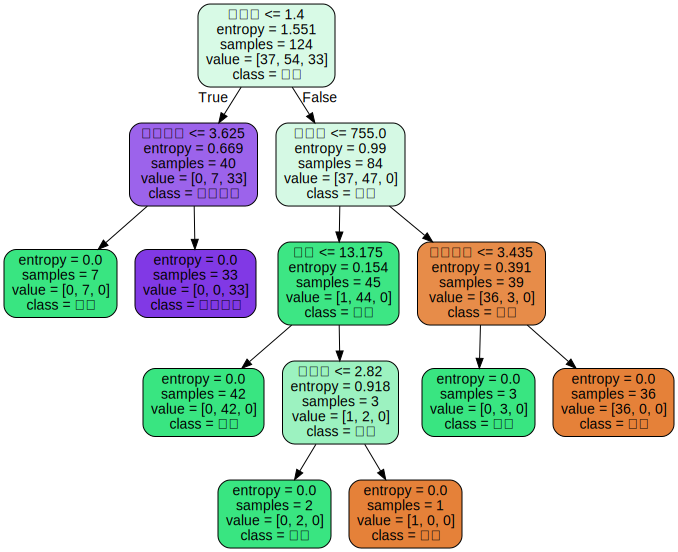

In [11]:
feature_names = ['酒精','苹果酸','灰','灰的碱性','镁','总酚',
                 '类黄酮','非黄烷类酚类','花青素','颜色强度',
                 '色调','od280/od315稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=feature_names,
                                class_names=['琴酒','雪莉','贝尔摩德'],
                                filled=True,  # 设置叶颜色
                                rounded=True,  # 设置叶子为圆形
#                                 label=False
                               )
graph = graphviz.Source(dot_data)
graph

#### 探索决策树

In [12]:
# 显示特征的重要性(权重)
clf.feature_importances_
[*zip(feature_names, clf.feature_importances_)]

[('酒精', 0.02164643433240562),
 ('苹果酸', 0.014322886851263617),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.42862165401355806),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.2184609274421724),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.3169480973606003)]

In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=30)
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
score

0.9814814814814815

#### 修改random_state&splitter参数

In [14]:
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  random_state=32,
                                  splitter='random')  # splitter='best' by default
clf = clf.fit(x_train, y_train)

score = clf.score(x_test, y_test)
score

0.9444444444444444

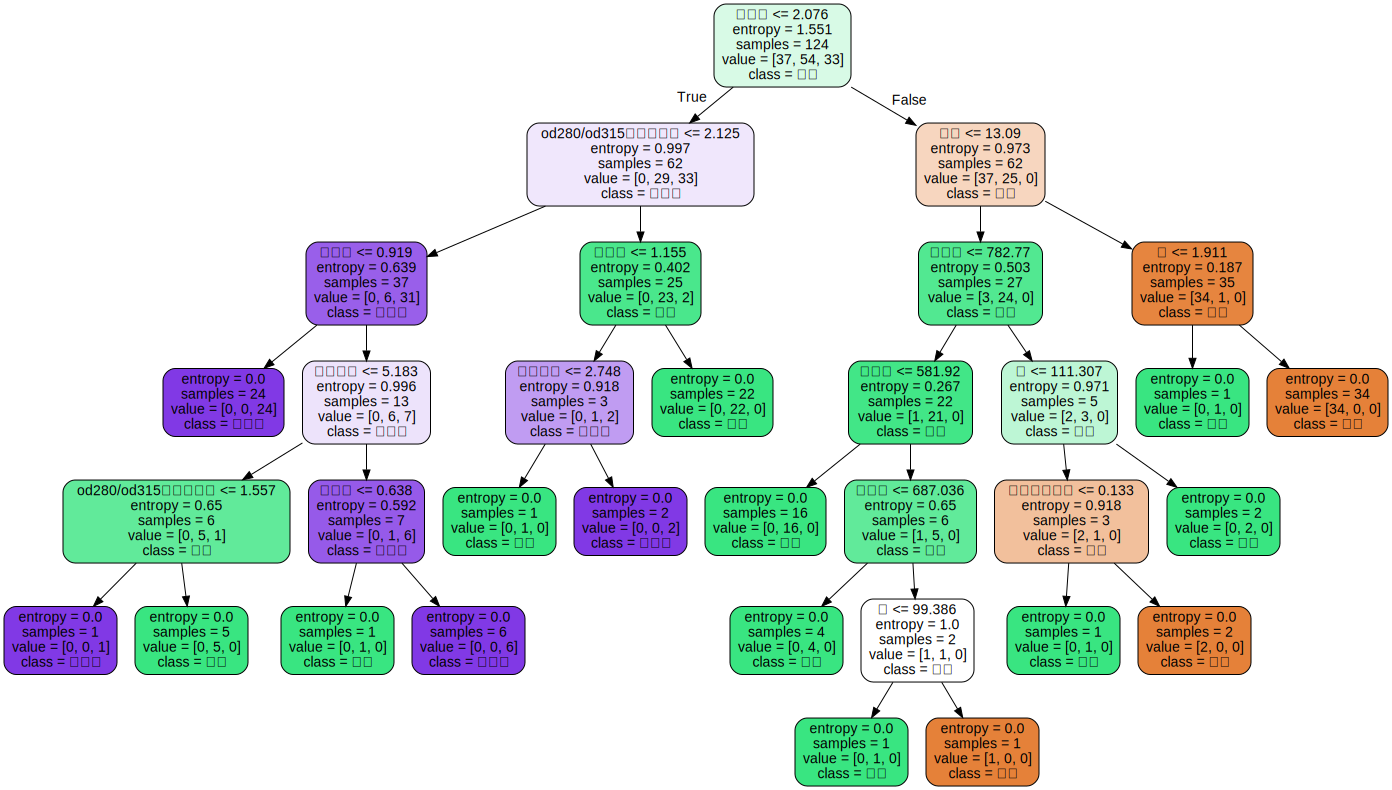

In [15]:
dot_data = tree.export_graphviz(clf, 
                                feature_names=feature_names,
                                class_names=['清酒', '茅台','五粮液'],
                                filled=True,
                                rounded=True
                                )
graphviz.Source(dot_data)

In [16]:
[*zip(feature_names, clf.feature_importances_)]

[('酒精', 0.20887234084362402),
 ('苹果酸', 0.0),
 ('灰', 0.03406006674379356),
 ('灰的碱性', 0.0),
 ('镁', 0.02131553799843766),
 ('总酚', 0.0),
 ('类黄酮', 0.4587097166485914),
 ('非黄烷类酚类', 0.014322886851263615),
 ('花青素', 0.02153308829404679),
 ('颜色强度', 0.03981197478901169),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.16636781216177202),
 ('脯氨酸', 0.03500657566945914)]

#### 剪枝参数

In [17]:
def draw_graph(**kwargs):
    clf=tree.DecisionTreeClassifier(**kwargs)
    clf = clf.fit(x_train, y_train)
    dot_data = tree.export_graphviz(clf, 
                                    feature_names=feature_names,
                                    class_names=['茅台', '五粮液', '泸州老窖'],
                                    filled=True,
                                    rounded=True)
    graph = graphviz.Source(dot_data)
    return graph, clf.score(x_test, y_test)

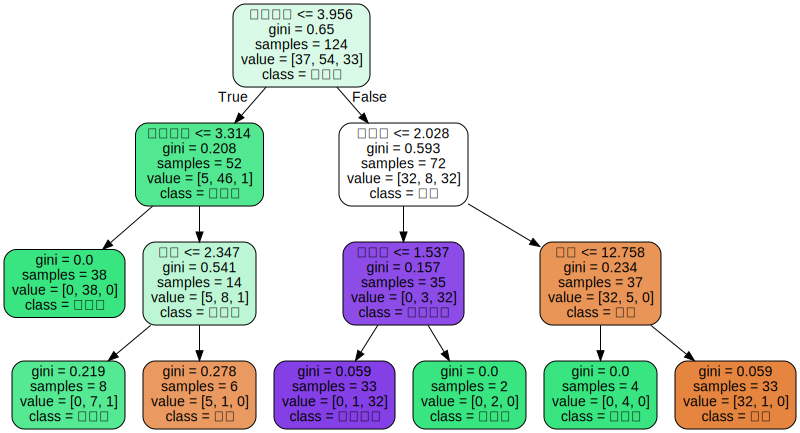

In [18]:
graph, score = draw_graph(random_state=30,
                          splitter='random',
                          max_depth=3,
                          
                          )
graph

In [19]:
score

0.9259259259259259

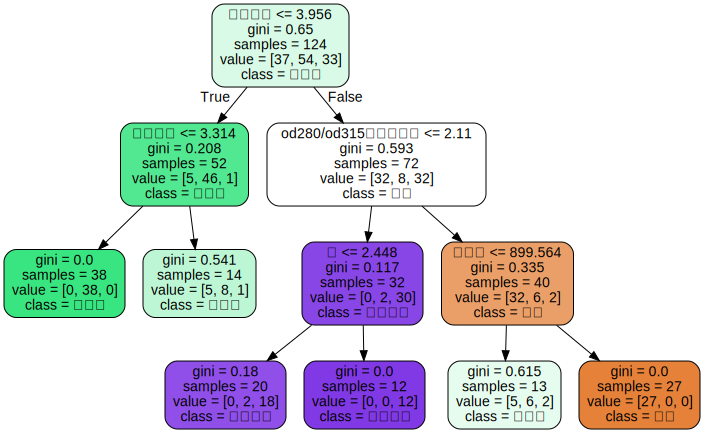

In [20]:
graph, score = draw_graph(random_state=30,
                          splitter='random',
                          max_depth=4,
                          min_samples_leaf=10
                          )
graph

In [21]:
score

0.8703703703703703

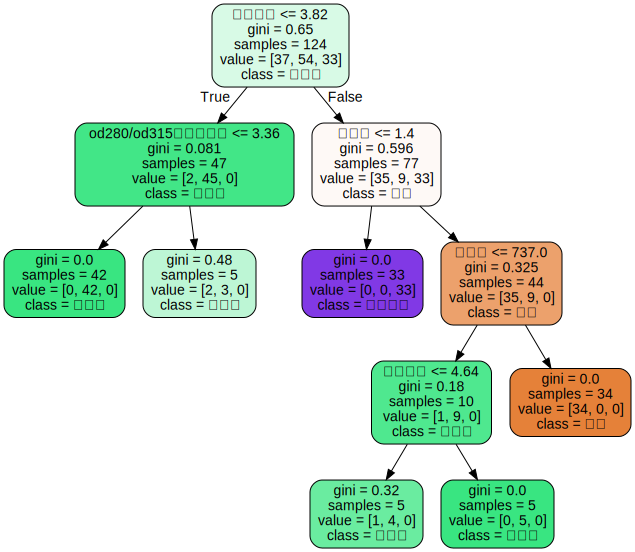

In [22]:
graph, score = draw_graph(random_state=30,
                          splitter='best',
                          max_depth=4,
                          min_samples_leaf=5,
                          min_samples_split=2
                          )
graph

In [23]:
score

0.9259259259259259

#### 确定最优参数

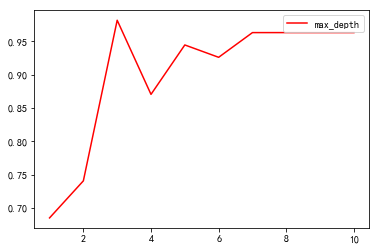

In [25]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )
    clf = clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [26]:
clf = tree.DecisionTreeClassifier(max_depth=4
                                ,criterion="entropy"
                                ,random_state=30
                                ,splitter="random"
                                )
clf = clf.fit(x_train, y_train)

In [27]:
clf.score(x_train, y_train)
clf.score(x_test, y_test)

0.8703703703703703

#### 重要属性和接口

属性是在模型训练之后，能够调用查看的模型的各种性质。对决策树来说，最重要的是feature_importances_，能
够查看各个特征对模型的重要性。  

sklearn中许多算法的接口都是相似的，比如说我们之前已经用到的fit和score，几乎对每个算法都可以使用。除了
这两个接口之外，决策树最常用的接口还有apply和predict。apply中输入测试集返回每个测试样本所在的叶子节点的索引，predict输入测试集返回每个测试样本的标签。返回的内容一目了然并且非常容易。   
在这里不得不提的是，**所有接口中要求输入X_train和X_test的部分，输入的特征矩阵必须至少是一个二维矩阵。
sklearn不接受任何一维矩阵作为特征矩阵被输入**。如果你的数据的确只有一个特征，那必须用reshape(-1,1)来给
矩阵增维；如果你的数据只有一个特征和一个样本，使用reshape(1,-1)来给你的数据增维。

In [160]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(x_test)

array([ 3, 16,  3, 19,  5, 14, 20, 16,  3, 14, 16, 10, 20, 20,  6, 20, 10,
       20, 20,  6,  5, 17, 16, 14, 20,  6,  5, 20, 14,  3,  9, 20, 10, 20,
       16, 14, 19, 16, 10, 20,  3, 20, 17, 20, 20, 20,  3, 20, 14, 20, 20,
       16, 16,  3], dtype=int64)

In [143]:
clf.predict(x_test)

array([2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0,
       1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 0, 1, 1, 2])

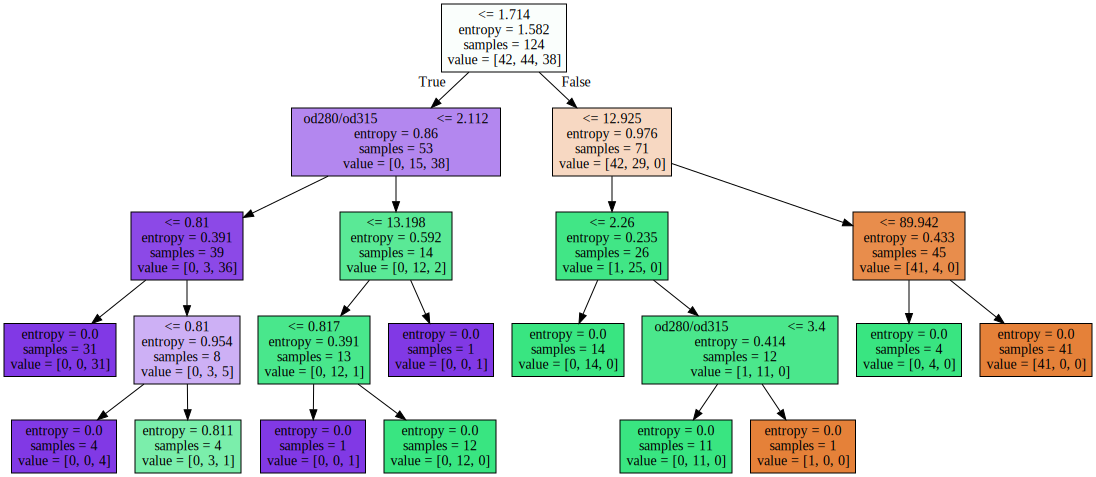

In [153]:
dot_data = tree.export_graphviz(clf,
                                feature_names=feature_names,
                                filled=True)
graph = graphviz.Source(dot_data)
graph

In [157]:
graph.save('images/graph.gv')

'images/graph.gv'

In [159]:
graph.view()

'images\\graph.gv.pdf'

# DecisionTreeRegressor(线性回归决策树)

In [34]:
from sklearn.tree import DecisionTreeRegressor


## 重要属性接口
```python
Init signature:
DecisionTreeRegressor(
    criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort=False,
)
```

### criterion(评估标准)
1. 输入"mse"使用均方误差mean squared error(MSE)，父节点和叶子节点之间的均方误差的差额将被用来作为
特征选择的标准，这种方法通过使用叶子节点的均值来最小化L2损失
2. 输入“friedman_mse”使用费尔德曼均方误差，这种指标使用弗里德曼针对潜在分枝中的问题改进后的均方误差
3. 输入"mae"使用绝对平均误差MAE（mean absolute error），这种指标使用叶节点的中值来最小化L1损失
属性中最重要的依然是feature_importances_，接口依然是apply, fit, predict, score最核心

$$MSE = \dfrac{1}{N}\displaystyle \sum_{i=1}^{N}(f_i - y_i)^2$$

其中N是样本数量，i是每一个数据样本，fi是模型回归出的数值，yi是样本点i实际的数值标签。所以MSE的本质，
其实是样本真实数据与回归结果的差异（类似于损失函数）。在回归树中，MSE不只是我们的分枝质量衡量指标，也是我们最常用的衡
量回归树回归质量的指标，当我们在使用交叉验证，或者其他方式获取回归树的结果时，我们往往选择均方误差作
为我们的评估（在分类树中这个指标是score代表的预测准确率）。在回归中，我们追求的是，**MSE越小越好**。
然而，**回归树的接口score返回的是R平方，并不是MSE**。R平方被定义如下:

$$R^2 = 1 - \dfrac{u}{v} \; \;\;其中, \\
u = \displaystyle \sum_{i=1}^{N}(f_i - y_i)^2\;\;\;\;v = \sum_{i=1}^{N}(y_i - \hat{y})^2$$

其中u为残差平方和(MSE * N), v是总平方和，N是样本数量，i是每一个数据样本，fi是模型回归出的数值，yi
是样本点i实际的数值标签。$\hat{y}$是**真实数值标签的平均数**。R平方可以为正为负（如果模型的残差平方和远远大于
模型的总平方和，模型非常糟糕，R平方就会为负），而均方误差永远为正


值得一提的是，**虽然均方误差永远为正，但是sklearn当中使用均方误差作为评判标准时，却是计算”负均方误
差“（neg_mean_squared_error）**。这是因为sklearn在计算模型评估指标的时候，会考虑指标本身的性质，均
方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)，因此在sklearn当中，都以负数表示。真正的
均方误差MSE的数值，其实就是neg_mean_squared_error去掉负号的数字


## 交叉验证


>交叉验证是用来观察模型的稳定性的一种方法，我们将数据划分为n份，依次使用其中一份作为测试集，其他n-1份
作为训练集，多次计算模型的精确性来评估模型的平均准确程度。训练集和测试集的划分会干扰模型的结果，因此
用交叉验证n次的结果求出的平均值，是对模型效果的一个更好的度量

### 使用sklearn实现交叉验证

In [37]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [39]:
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10)
                #, scoring='neg_mean_squared_error')

array([ 0.52939335,  0.60461936, -1.60907519,  0.4356399 ,  0.77280671,
        0.40597035,  0.23656049,  0.38709149, -2.06488186, -0.95162992])

sklearn fit只支持二维数据
reval降维

## 示例：一维回归的图像绘制

In [45]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [48]:
# 设置随机种子
rng = np.random.RandomState(1)
# 生成0-5区间内的随机数据 with shape (80, 1)
x = np.sort(5 * rng.rand(80,1), axis=0)
# 生成x对应的sin(y)
y = np.sin(x).ravel()  # ravel() 将数据降到一维

In [49]:
# 对y添加噪音
y[::5] += 3 * (0.5 - rng.rand(16))

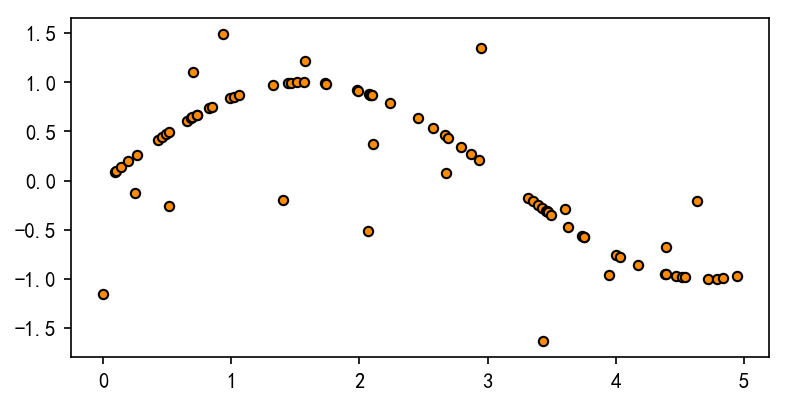

In [57]:
fig = plt.figure(dpi=150, figsize=(6,3))
plt.scatter(x, y, s=20, edgecolors='black', c='darkorange', label='data')
plt.show()

In [58]:
# 进行线性回归决策树拟合，创建3个max_path不同的决策树
regressor_1 = DecisionTreeRegressor(max_depth=2)
regressor_2 = DecisionTreeRegressor(max_depth=3)
regressor_3 = DecisionTreeRegressor(max_depth=5)

In [63]:
reg_1 = regressor_1.fit(x, y)
reg_2 = regressor_2.fit(x, y)
reg_3 = regressor_3.fit(x, y)

In [65]:
# 创建测试集
x_test = np.linspace(0, 5, 100)[:, np.newaxis]

In [66]:
# 拟合数据
y_1 = reg_1.predict(x_test)
y_2 = reg_2.predict(x_test)
y_3 = reg_3.predict(x_test)

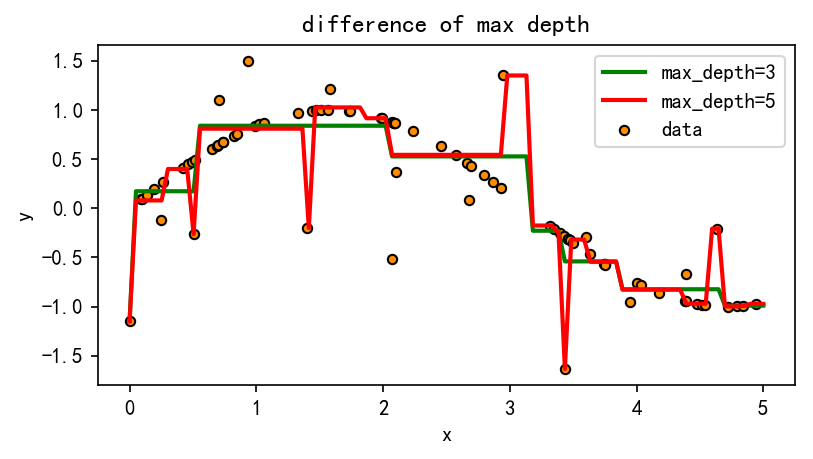

In [72]:
# 绘图
fig = plt.figure(dpi=150, figsize=(6,3))
plt.scatter(x, y, s=20, edgecolors='black', c='darkorange', label='data')
# plt.plot(x_test, y_1, color='cornflowerblue', label='max_depth=2', linewidth=2)
plt.plot(x_test, y_2, color='green', label='max_depth=3', linewidth=2)
plt.plot(x_test, y_3,color='red', label='max_depth=5', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('difference of max depth')
plt.legend(loc='best')

plt.show()

# 示例：泰坦尼克幸存者的预测

In [73]:
import seaborn as sns

In [75]:
df = sns.load_dataset('titanic')

In [76]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
